<a href="https://colab.research.google.com/github/Sonacdac14/RP_Detection-with-AI/blob/main/Hybrid_model_Resnet(VGG16%2B19).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Nov 27 04:58:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Eye/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Eye/test'

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/Eye/train/*')

In [ ]:
folders

['/content/drive/MyDrive/Colab Notebooks/Eye/train/Retinitis Image',
 '/content/drive/MyDrive/Colab Notebooks/Eye/train/Normal Image']

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Eye/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 3313 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Eye/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 1411 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
208/208 [==============================] - 1194s 6s/step - loss: 0.6125 - accuracy: 0.8316 - val_loss: 0.2168 - val_accuracy: 0.8873
Epoch 2/10
208/208 [==============================] - 139s 669ms/step - loss: 0.2889 - accuracy: 0.8856 - val_loss: 0.0900 - val_accuracy: 0.9858
Epoch 3/10
208/208 [==============================] - 139s 667ms/step - loss: 0.1594 - accuracy: 0.9369 - val_loss: 1.9649 - val_accuracy: 0.6704
Epoch 4/10
208/208 [==============================] - 137s 659ms/step - loss: 0.1775 - accuracy: 0.9366 - val_loss: 0.2046 - val_accuracy: 0.9313
Epoch 5/10
208/208 [==============================] - 138s 662ms/step - loss: 0.1208 - accuracy: 0.9559 - val_loss: 0.1323 - val_accuracy: 0.9639
Epoch 6/10
208/208 [==============================] - 137s 659ms/step - loss: 0.0980 - accuracy: 0.9656 - val_loss: 0.0805 - val_accuracy: 0.9965
Epoch 7/10
208/208 [==============================] - 137s 657ms/step - loss: 0.0983 - accuracy: 0.9620 - val_loss: 0.2758 - v

In [ ]:
import matplotlib.pyplot as plt

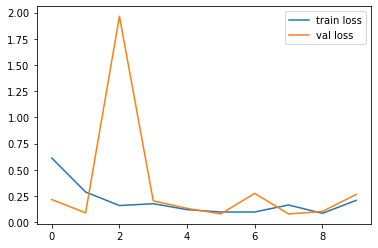

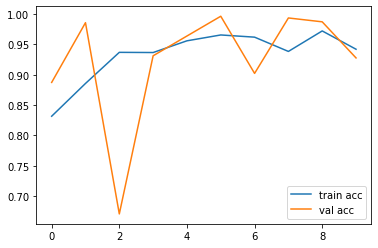

<Figure size 432x288 with 0 Axes>

In [ ]:

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Eye/LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Eye/AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/Eye/RetinitisPigmentosa.h5')

In [ ]:
y_pred = model.predict(test_set)

89/89 [==============================] - 36s 392ms/step


In [ ]:
y_pred

array([[9.9999821e-01, 1.7737099e-06],
       [7.4544710e-01, 2.5455287e-01],
       [9.9999452e-01, 5.4697825e-06],
       ...,
       [2.4364372e-03, 9.9756360e-01],
       [9.5980012e-01, 4.0199850e-02],
       [9.9999869e-01, 1.3167229e-06]], dtype=float32)

In [ ]:
#y_pred = model.predict()

In [ ]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(test_set,y_pred)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/drive/MyDrive/Colab Notebooks/Eye/RetinitisPigmentosa.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/Eye/test/Retinitis Image/rpa_0_1334.jpeg',target_size=(224,224))

In [ ]:
img_data

array([[[[-102.939, -116.779, -121.68 ],
         [-102.939, -116.779, -121.68 ],
         [-102.939, -115.779, -122.68 ],
         ...,
         [-100.939, -115.779, -122.68 ],
         [-100.939, -115.779, -122.68 ],
         [-100.939, -115.779, -122.68 ]],

        [[-102.939, -116.779, -121.68 ],
         [-102.939, -116.779, -121.68 ],
         [-102.939, -115.779, -122.68 ],
         ...,
         [-100.939, -115.779, -122.68 ],
         [-100.939, -115.779, -122.68 ],
         [-100.939, -115.779, -122.68 ]],

        [[-102.939, -116.779, -121.68 ],
         [-102.939, -116.779, -121.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-100.939, -115.779, -122.68 ],
         [-100.939, -115.779, -122.68 ],
         [-100.939, -115.779, -122.68 ]],

        ...,

        [[-101.939, -116.779, -123.68 ],
         [-101.939, -116.779, -123.68 ],
         [-100.939, -115.779, -122.68 ],
         ...,
         [-100.939, -115.779, -122.68 ],
         [-100.939, -1

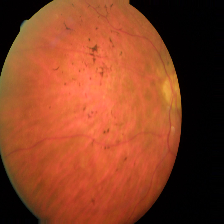

In [ ]:
img

In [ ]:
x=image.img_to_array(img)
x

array([[[2., 0., 1.],
        [2., 0., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 3.],
        [1., 1., 3.],
        [1., 1., 3.]],

       [[2., 0., 1.],
        [2., 0., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 3.],
        [1., 1., 3.],
        [1., 1., 3.]],

       [[2., 0., 1.],
        [2., 0., 1.],
        [0., 0., 0.],
        ...,
        [1., 1., 3.],
        [1., 1., 3.],
        [1., 1., 3.]],

       ...,

       [[0., 0., 2.],
        [0., 0., 2.],
        [1., 1., 3.],
        ...,
        [1., 1., 3.],
        [1., 1., 3.],
        [1., 1., 3.]],

       [[0., 0., 2.],
        [0., 0., 2.],
        [1., 1., 3.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 2.],
        [0., 0., 2.],
        [1., 1., 3.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 0s 25ms/step


array([[1., 0.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 22ms/step


In [ ]:
if(a==1):
  print("Normal image")
else:
  print("Retinitis Pigmentosa image")


Retinitis Pigmentosa image


In [ ]:
a==1

array([False])